### Imports

In [12]:
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import distance
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import datetime
from matplotlib.ticker import AutoMinorLocator

### Loading relevant data

In [15]:
path = "01-EarthCARE/ECA_EXAA_ATL_AER_2A_20241231T183450Z_20230131T101449Z_39316D/"
filename = "ECA_EXAA_ATL_AER_2A_20241231T183450Z_20230131T101449Z_39316D.h5"
data = nc.Dataset(path+filename, "r", format="hdf5")

science_data = data.groups["ScienceData"]
lat = science_data["latitude"][:]
lon = science_data["longitude"][:]
pbsc = science_data["particle_backscatter_coefficient_355nm"][:]
time = science_data["time"][:]
height = science_data["height"][:]
data.close()

### Filtering data for desired latitude range

In [33]:
# Creating masking array
latrangemask =  (33 <=lat) & (lat <= 34)

# Filtering data
filtered_pbsc = pbsc[latrangemask,:]
filtered_time = time[latrangemask]
filtered_height = height[latrangemask,:]

### Formatting time data

In [34]:
# converting from elapsed seconds to datetime strings
start_time = datetime.datetime(2000,1,1)
time_formatted = np.atleast_2d([start_time + datetime.timedelta(seconds=s) for s in filtered_time])

# converting from meters to kilometers
height_formatted = filtered_height / 1000

### Creating the figure

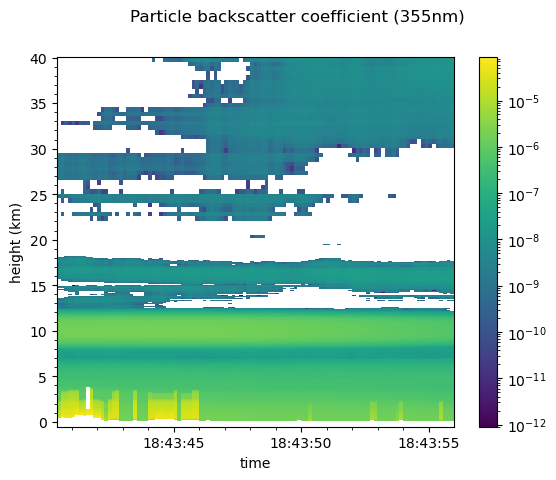

In [41]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.pcolormesh(time_formatted,
                    height_formatted.T,
                    filtered_pbsc.T,
                    shading="nearest",
                    norm=matplotlib.colors.LogNorm())

# axis labels
ax.set_xlabel("time")
ax.set_ylabel("height (km)")

# adjust ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_yticks(np.arange(40),minor=True)

### Creating colorbar
fig.colorbar(im)

fig.suptitle("Particle backscatter coefficient (355nm)")

plt.show()